In [ ]:
#Carga de librerias y de archivo csv a un dataframe.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_shoe = pd.read_csv('/content/sample_data/shoesize.csv', index_col='Index')

En el dataframe se distinguen tres conjuntos de datos relevantes: genero, talla y altura. Haciendo un analisis exploratorio se determina es necesario aplicar la codificación ***one hot encoding*** a la columna 'genero'. 

In [ ]:
#Análisis exploratorio de datos con cambio a mayurculas en headers
df_shoe.columns = df_shoe.columns.str.upper()
df_shoe

,GENDER,SIZE,HEIGHT
Index,,,
1,F,5.5,60.0
2,F,6.0,60.0
3,F,7.0,60.0
4,F,8.0,60.0
5,F,8.0,60.0
...,...,...,...
404,M,13.0,78.0
405,M,13.0,78.0
406,M,14.0,78.0


Al final del reporte es posible ver que no existen datos perdidos o nulos en el dataframe, por lo que no es necesario realizar **imputacion de datos**.

Los datos alojados en las columnas 'talla' y 'altura' están dentro de los valores aceptables, por lo que no hay **outliers**.

In [ ]:
print('\nValores estadisticos generales: \n\n', df_shoe.describe(),'\n\n\n')
print('\nTipo de datos de cada columna: \n')
print('\t\tGender  ----->  ', df_shoe['GENDER'].dtypes, '\n')
print('\t\tSize    ----->  ', df_shoe['SIZE'].dtypes, '\n')
print('\t\tHeight  ----->  ', df_shoe['HEIGHT'].dtypes, '\n')
print('\nCantidad de filas:\n\t\t', df_shoe.shape[0], "\n")
print('Cantidad de columnas:\n\t\t', df_shoe.shape[1], '\n')
print('Valores nulos por columna: \n',df_shoe.isnull().sum())


Valores estadisticos generales: 

              SIZE      HEIGHT
count  408.000000  408.000000
mean     9.908088   68.421127
std      2.066346    4.211939
min      5.000000   60.000000
25%      8.000000   65.000000
50%     10.000000   68.000000
75%     11.000000   72.000000
max     15.000000   81.000000 




Tipo de datos de cada columna: 

		Gender  ----->   object 

		Size    ----->   float64 

		Height  ----->   float64 


Cantidad de filas:
		 408 

Cantidad de columnas:
		 3 

Valores nulos por columna: 
 GENDER    0
SIZE      0
HEIGHT    0
dtype: int64


In [ ]:
#Cambio de presentacion de datos en la columna 'genero'
df_shoe['GENDER'] = df_shoe['GENDER'].map({'F':'FEMALE','M':'MALE'}, na_action=None)
df_shoe

,GENDER,SIZE,HEIGHT
Index,,,
1,FEMALE,5.5,60.0
2,FEMALE,6.0,60.0
3,FEMALE,7.0,60.0
4,FEMALE,8.0,60.0
5,FEMALE,8.0,60.0
...,...,...,...
404,MALE,13.0,78.0
405,MALE,13.0,78.0
406,MALE,14.0,78.0


Como primer paso del analisis se generó un scatterplot con lineas de regresión para representar la posible **relacion entre la talla de los zapatos y la altura de las personas de hombres y mujeres**. A simple vista es posible distinguir una relacion lineal positiva para ambos casos.

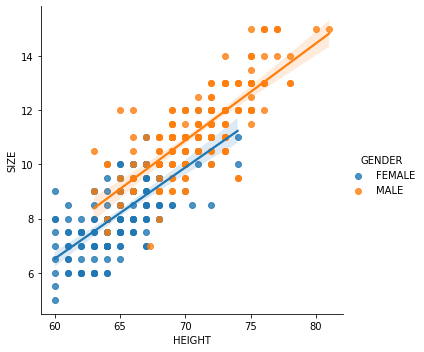

In [ ]:
sns.lmplot(x='HEIGHT', y='SIZE', hue = 'GENDER', data=df_shoe, fit_reg = True)

Para reforzar los descubrimientos anteriores con resultados estadísticos se dividen los datos por género y se reemplazan las variables categoricas por numéricas.

Se procede a preparar y reemplazar la columna 'genero' para extraer las variables dummy

In [ ]:
gender_dummy = pd.get_dummies(df_shoe["GENDER"], prefix='GENDER')
df_shoe = pd.concat([df_shoe, gender_dummy], axis=1)
df_shoe = df_shoe.drop(['GENDER'], axis=1)
df_shoe

,SIZE,HEIGHT,GENDER_FEMALE,GENDER_MALE
Index,,,,
1,5.5,60.0,1,0
2,6.0,60.0,1,0
3,7.0,60.0,1,0
4,8.0,60.0,1,0
5,8.0,60.0,1,0
...,...,...,...,...
404,13.0,78.0,0,1
405,13.0,78.0,0,1
406,14.0,78.0,0,1


Filtrado de datos en dos dataframes separados por genero.

In [ ]:
calzado_H = df_shoe[df_shoe["GENDER_MALE"] == 1]
calzado_H

,SIZE,HEIGHT,GENDER_FEMALE,GENDER_MALE
Index,,,,
188,10.5,63.0,0,1
189,9.0,63.0,0,1
190,7.5,64.0,0,1
191,8.0,64.0,0,1
192,10.0,64.0,0,1
...,...,...,...,...
404,13.0,78.0,0,1
405,13.0,78.0,0,1
406,14.0,78.0,0,1


In [ ]:
calzado_M = df_shoe[df_shoe["GENDER_FEMALE"] == 1]
calzado_M

,SIZE,HEIGHT,GENDER_FEMALE,GENDER_MALE
Index,,,,
1,5.5,60.0,1,0
2,6.0,60.0,1,0
3,7.0,60.0,1,0
4,8.0,60.0,1,0
5,8.0,60.0,1,0
...,...,...,...,...
183,10.0,72.0,1,0
184,11.0,72.0,1,0
185,11.0,72.0,1,0


Analisis mediante gráfico de lineas, no se detectó patrón o tendencia alguna.

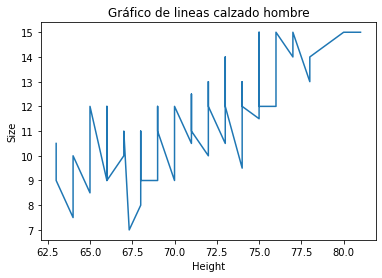

In [ ]:
plt.plot(calzado_H['HEIGHT'], calzado_H['SIZE'])
plt.title('Gráfico de lineas calzado hombre')
plt.xlabel('Height')
plt.ylabel('Size')
plt.show()

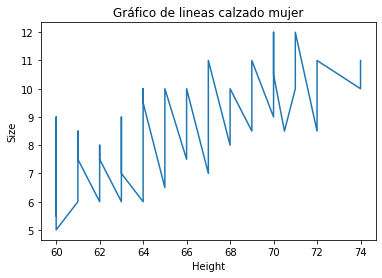

In [ ]:
plt.plot(calzado_M['HEIGHT'], calzado_M['SIZE'])
plt.title('Gráfico de lineas calzado mujer')
plt.xlabel('Height')
plt.ylabel('Size')
plt.show()

Análisis mediante gráfico de puntos, aquí si es posible detectar la tendencia lineal positiva encontrada en análisis anteriores.

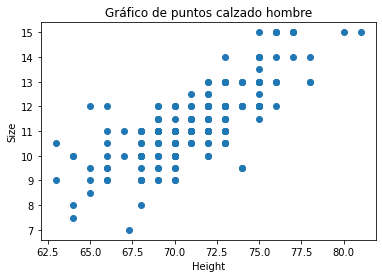

In [ ]:
plt.scatter(calzado_H['HEIGHT'], calzado_H['SIZE'])
plt.title('Gráfico de puntos calzado hombre')
plt.xlabel('Height')
plt.ylabel('Size')
plt.show()

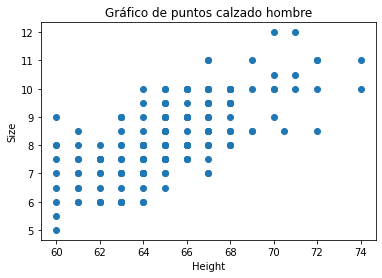

In [ ]:
plt.scatter(calzado_M['HEIGHT'], calzado_M['SIZE'])
plt.title('Gráfico de puntos calzado hombre')
plt.xlabel('Height')
plt.ylabel('Size')
plt.show()

Cálculo del coheficiente de correlación y mapa de calor para identificar numericamente si existe relacion alguna entre las columnas del dataframe. Se identifica una **corelación fuerte de 0.76 y 0.7** entre las columnas 'talla' y 'altura' de los dataframes de hombres y mujeres respectivamente.

In [ ]:
matriz_h = calzado_H.corr()
matriz_h

,SIZE,HEIGHT,GENDER_FEMALE,GENDER_MALE
SIZE,1.000000,0.767709,NaN,NaN
HEIGHT,0.767709,1.000000,NaN,NaN
GENDER_FEMALE,NaN,NaN,NaN,NaN
GENDER_MALE,NaN,NaN,NaN,NaN


In [ ]:
matriz_m = calzado_M.corr()
matriz_m

,SIZE,HEIGHT,GENDER_FEMALE,GENDER_MALE
SIZE,1.000000,0.707812,NaN,NaN
HEIGHT,0.707812,1.000000,NaN,NaN
GENDER_FEMALE,NaN,NaN,NaN,NaN
GENDER_MALE,NaN,NaN,NaN,NaN


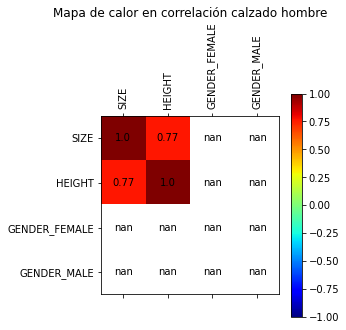

In [ ]:
plt.matshow(matriz_h, cmap="jet", vmin=-1, vmax=1)
plt.title('Mapa de calor en correlación calzado hombre', loc='center', pad=90)
plt.xticks(range(matriz_h.shape[1]), matriz_h.columns, rotation=90)
plt.yticks(range(matriz_h.shape[0]), matriz_h.columns)
for i in range(len(matriz_h.columns)):
  for j in range(len(matriz_h.columns)):
    plt.text(i,j,round(matriz_h.iloc[i,j], 2), ha="center", va="center")
plt.colorbar()
plt.show()

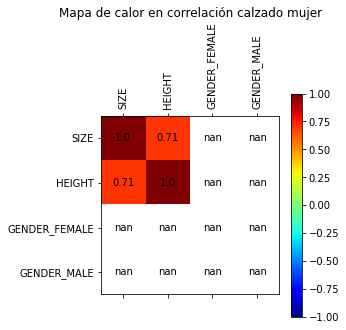

In [ ]:
plt.matshow(matriz_m, cmap="jet", vmin=-1, vmax=1)
plt.title('Mapa de calor en correlación calzado mujer', loc='center', pad=90)
plt.xticks(range(matriz_m.shape[1]), matriz_m.columns, rotation=90)
plt.yticks(range(matriz_m.shape[0]), matriz_m.columns)
for i in range(len(matriz_m.columns)):
  for j in range(len(matriz_m.columns)):
    plt.text(i,j,round(matriz_m.iloc[i,j], 2), ha="center", va="center")
plt.colorbar()
plt.show()

# CONCLUSIÓN: Debido a los análisis exploratorios y estadísticos realizados al conjunto de datos se encontró que existe una correlación lineal positiva importante entre la talla de calzado y la altura de las personas tanto de género masculino como del femenino, siendo ligeramente más marcada esta relación en los hombres.